In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]},index=[1,2,3])
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [4]:
df.sort_values(1, axis=1, ascending=False)

,c,b,a
1,7,4,1
2,8,5,2
3,9,6,3


In [5]:
df.head(2)

,a,b,c
1,1,4,7
2,2,5,8


In [6]:
pd.concat([df,df],axis=0)

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9
1,1,4,7
2,2,5,8
3,3,6,9


In [7]:
#[] - list or location, {} - dictionary, () - function parameters, tuple, set
#.loc is labels, .iloc is indices
df.loc[:,('b','c')]
df.iloc[:,1:]

,b,c
1,4,7
2,5,8
3,6,9


In [8]:
dict = {'names': ['emma', 'sara', 'matt'], 'grades':[100,100,100]}
pd.DataFrame(dict)

,names,grades
0,emma,100
1,sara,100
2,matt,100


In [9]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]},
index=pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)], names=["letter", "number"]))
df

a  b  c
letter number         
d      1       1  4  7
       2       2  5  8
e      2       3  6  9

In [10]:
tipsData = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [11]:
tipsData.groupby(['day']).sum() 

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [12]:
#tips/totalbills*100
tipdaypercentage = tipsData.groupby(['day']).sum() ['tip']/tipsData.groupby(['day']).sum()['total_bill']*100
tipdaypercentage

day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
dtype: float64

In [13]:
tipdaypercentage = tipdaypercentage.to_frame('tips(%)').reset_index()

In [14]:
tipdaypercentage


,day,tips(%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


Text(0, 0.5, 'percentage per day')

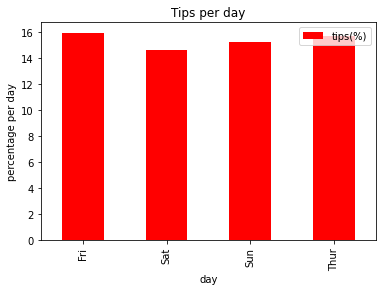

In [15]:
fig, ax = plt.subplots()
tipdaypercentage.plot(kind='bar', x='day', y='tips(%)', ax=ax, color='red')
ax.set_title('Tips per day')
ax.set_ylabel('percentage per day')

In [16]:
day_count = pd.DataFrame(tipsData['day'].value_counts()).reset_index()
day_count.columns = ('day','count')
day_count

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


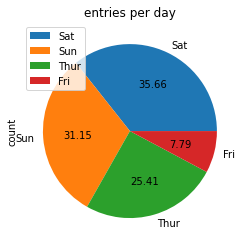

In [17]:
fig, ax = plt.subplots()
day_count.plot(kind='pie', y='count', labels=day_count['day'],ax=ax,autopct='%1.2f')
ax.set_title('entries per day')
ax.legend(loc='upper left')


array([<AxesSubplot:title={'center':'total_bill'}>], dtype=object)

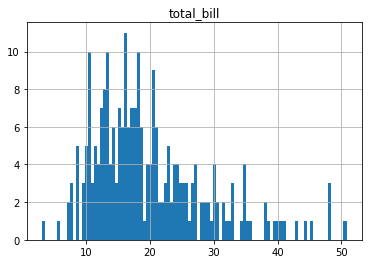

In [18]:
fig,ax = plt.subplots()
tipsData.hist(column='total_bill',ax=ax, bins=100)

In [19]:
tipsData

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
pd.DataFrame(pd.pivot_table(tipsData, index=['sex', 'smoker'], aggfunc=np.sum))

size     tip  total_bill
sex    smoker                          
Female No       140  149.77      977.68
       Yes       74   96.74      593.27
Male   No       263  302.00     1919.75
       Yes      150  183.07     1337.07

In [21]:
ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')

geometry = geopandas.points_from_xy(efilmag.longitude, efilmag.latitude)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
%matplotlib inline
fig,ax = plt.subplots()
world.plot(ax=ax, alpha=0.4, color='gray')
#shows plates
data.plot(kind = 'scatter', x = 'lon', y = 'lat',ax=ax, s=1, color='gray')
efilmag.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5, 
color = '#FF0099', ax = ax)